# **ONTADA ASSESMENT OVERVIEW** 

treatments.json contains records of chemotherapeutic treatment for five patients. facts.json contains a list of observations made about one of these patients in the process of assigning a stage grouping to their disease.

**1. Treatments question**

What kinds of drugs are being administered to these patients? 
Hint: Consider how you might use third party reference databases to infer, standardize, and classify the information contained in these records

**2. Facts question**

How would you use an interoperability standard to express these data? 
Hint: There are many standards for exchanging and storing health information. You may want to consider not only how to record this information using one of those standards, but also to express and interrelate its meaning.

**Notes**

As with real world data, this fake data is incomplete and messy. The exercise is subjective; there will not be a "right answer". We are interested in understanding your thought process; how you use the technologies of your choice to get to your answer; and how well you express those answers.

**Submission Process**

Please create a private github repository with your submission. Be sure to share all code. For the writeup, HTML (including markdown) is encouraged, and other open formats are welcome.

# Import Libraries

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Load Data

In [28]:
df_facts = pd.read_json(r'/Users/jagpreetbatth/Ontada/facts[52].json')
df_treatments = pd.read_json(r'/Users/jagpreetbatth/Ontada/treatments[75].json')

# Data Overview & Load Check

In [29]:
df_facts.head

<bound method NDFrame.head of    PAT_ID  PAT_VISIT_ID  DIAGNOSIS_ID         DIAGNOSIS_NAME        NAME  \
0      61             1             1  Breast cancer, female    hist_typ   
1      61             1             1  Breast cancer, female          er   
2      61             1             1  Breast cancer, female  hist_grade   
3      61             1             1  Breast cancer, female     her2neu   
4      61             6             1  Breast cancer, female    location   
5      61             6             1  Breast cancer, female       t_val   
6      61             6             1  Breast cancer, female  path_n_val   
7      61             6             1  Breast cancer, female       n_val   
8      61             6             1  Breast cancer, female       m_val   
9      61             1             1  Breast cancer, female          pr   

                                               VALUE  
0                         Invasive lobular carcinoma  
1                      

In [30]:
df_treatments.head

<bound method NDFrame.head of      DRUG_ADMIN_ID  PAT_ID  DRUG_TERM_ID  \
0                1      61            61   
1                2      61             5   
2                3      61            61   
3                4      61            61   
4                5      61             5   
..             ...     ...           ...   
225            226       1           171   
226            227       1           171   
227            228       1           171   
228            229       1           171   
229            230       1           171   

                                              NDDF_GCN    ROUTE    DOSE UNIT  \
0    8815|8815|61483|61483|8819|8819|8817|8817|6412...  IV Push   114.0   mg   
1                        8765|8765|8767|8767|8769|8769     IVPB  1130.0   mg   
2    8815|8815|61483|61483|8819|8819|8817|8817|6412...  IV Push   114.0   mg   
3    8815|8815|61483|61483|8819|8819|8817|8817|6412...  IV Push   114.0   mg   
4                        8765|8765|8767|8

In [31]:
df_facts.shape

(10, 6)

In [32]:
df_treatments.shape

(230, 31)

In [33]:
df_treatments.dtypes

DRUG_ADMIN_ID                   int64
PAT_ID                          int64
DRUG_TERM_ID                    int64
NDDF_GCN                       object
ROUTE                          object
DOSE                          float64
UNIT                           object
PAT_CARE_PLAN_TREATMENT_ID      int64
VISIT_DATE                     object
TRMT_START_DATE                object
TRMT_STOP_DATE                 object
ACTTRMT_START_DATE             object
ACTTRMT_STOP_DATE              object
CYCLE_NO                        int64
CYCLE_DAY                       int64
DISPENSE_FORM                  object
STRENGTH_NUM                    int64
STRENGTH_UNIT                  object
STRENGTH_DENOM                float64
STRENGTH_DENOM_UNIT            object
CONVERTED_DOSE                float64
CONVERT_TO_UNIT                object
DRUG_FORMULA_DOSE             float64
DRUG_FORMULA_UNIT              object
PRIMARY_DIAGNOSIS              object
REG_DRUG_GROUP                 object
PLAN_CYL_LEN

In [34]:
df_facts.dtypes

PAT_ID             int64
PAT_VISIT_ID       int64
DIAGNOSIS_ID       int64
DIAGNOSIS_NAME    object
NAME              object
VALUE             object
dtype: object

In [35]:
df_facts.describe

<bound method NDFrame.describe of    PAT_ID  PAT_VISIT_ID  DIAGNOSIS_ID         DIAGNOSIS_NAME        NAME  \
0      61             1             1  Breast cancer, female    hist_typ   
1      61             1             1  Breast cancer, female          er   
2      61             1             1  Breast cancer, female  hist_grade   
3      61             1             1  Breast cancer, female     her2neu   
4      61             6             1  Breast cancer, female    location   
5      61             6             1  Breast cancer, female       t_val   
6      61             6             1  Breast cancer, female  path_n_val   
7      61             6             1  Breast cancer, female       n_val   
8      61             6             1  Breast cancer, female       m_val   
9      61             1             1  Breast cancer, female          pr   

                                               VALUE  
0                         Invasive lobular carcinoma  
1                  

In [36]:
df_treatments.describe

<bound method NDFrame.describe of      DRUG_ADMIN_ID  PAT_ID  DRUG_TERM_ID  \
0                1      61            61   
1                2      61             5   
2                3      61            61   
3                4      61            61   
4                5      61             5   
..             ...     ...           ...   
225            226       1           171   
226            227       1           171   
227            228       1           171   
228            229       1           171   
229            230       1           171   

                                              NDDF_GCN    ROUTE    DOSE UNIT  \
0    8815|8815|61483|61483|8819|8819|8817|8817|6412...  IV Push   114.0   mg   
1                        8765|8765|8767|8767|8769|8769     IVPB  1130.0   mg   
2    8815|8815|61483|61483|8819|8819|8817|8817|6412...  IV Push   114.0   mg   
3    8815|8815|61483|61483|8819|8819|8817|8817|6412...  IV Push   114.0   mg   
4                        8765|8765|87

# Data Integrity Check
Treatments Patient Load = 5
Facts Patient Load = 1

In [37]:
TreatmentsPT = df_treatments.PAT_ID.unique()
TreatmentsPT.sort()
print(TreatmentsPT)
if(len(TreatmentsPT == 5)):
    print("Treatments Patient Load Correct " + str(len(TreatmentsPT)) + " loaded")
else: 
    print("Treatment Patient Load Incorrect")


FactsPT = df_facts.PAT_ID.unique()
FactsPT.sort()
print(FactsPT)
if(len(FactsPT == 1)):
    print("Facts Patient Load Correct " + str(len(FactsPT)) + " loaded")
else:
    print("Facts Patient Load Incorrect")

[  1  61 110 147 159]
Treatments Patient Load Correct 5 loaded
[61]
Facts Patient Load Correct 1 loaded


# Q1. Treatments question
What kinds of drugs are being administered to these patients? Hint: Consider how you might use third party reference databases to infer, standardize, and classify the information contained in these records.

** Note: With my experience in healthcare and various coding standards, LOINC, CPT, ICD-10 and in this case NDDF codes, I will try and implement multiple ways of showing "kinds of drugs" given to the sample patient load and alloted time frame.  

## A. Count of NDDF Codes to show most common drug types (NDDF code lookup via NIH does not bring up data for Codes provided in sample pateint dataset )

In [43]:
NDDFComplete = []

NDDFDistinct = df_treatments.NDDF_GCN

for nddf in NDDFDistinct:        
    NDDFComplete.append(nddf.split("|"))

NDDFComplete = np.hstack(NDDFComplete)

values, counts = np.unique(NDDFComplete, return_counts=True)

arr = np.stack((  values,counts), axis=1)

print(np.max(counts))
print(arr)

120
[['18764' '11']
 ['25665' '6']
 ['25728' '7']
 ['25729' '7']
 ['26807' '6']
 ['36550' '24']
 ['36745' '24']
 ['36758' '24']
 ['36870' '5']
 ['38450' '4']
 ['42496' '36']
 ['44533' '17']
 ['44534' '17']
 ['44535' '17']
 ['44540' '17']
 ['44541' '17']
 ['44542' '17']
 ['46997' '33']
 ['49872' '6']
 ['53713' '5']
 ['59162' '24']
 ['59163' '24']
 ['61073' '17']
 ['61483' '21']
 ['61484' '21']
 ['61669' '60']
 ['61670' '60']
 ['61671' '60']
 ['61672' '60']
 ['61845' '13']
 ['62173' '12']
 ['62174' '6']
 ['62175' '24']
 ['63305' '6']
 ['64079' '6']
 ['64126' '21']
 ['65188' '7']
 ['66838' '120']
 ['67043' '6']
 ['68084' '7']
 ['68085' '7']
 ['68086' '7']
 ['72990' '24']
 ['72991' '24']
 ['73319' '3']
 ['75249' '36']
 ['8765' '21']
 ['8767' '21']
 ['8769' '21']
 ['8785' '4']
 ['8787' '4']
 ['8788' '4']
 ['8789' '4']
 ['8801' '15']
 ['8812' '13']
 ['8815' '21']
 ['8817' '21']
 ['8818' '21']
 ['8819' '21']
 ['8841' '13']]


### NOTE: NFFD code 66838 as being the highest number of times a drug is adminstered followed by 61671, 61669 and 61672 at equal amounts in given sample patient data set. 

## B. Oncological Drugs Based Stratification
** Note: Based on my clinical experience in Healthcare in knowing both the SQL/Python coding & drugs given in commonly occuring cancers, I will show what drugs are given based on the various drugs listed in the sample patient database.

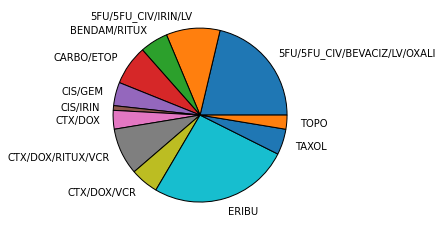

In [49]:
NDDFComplete = []

NDDFDistinct = df_treatments.REG_DRUG_GROUP

for nddf in NDDFDistinct:
    NDDFComplete.append(nddf)

NDDFComplete = np.hstack(NDDFComplete)

values, counts = np.unique(NDDFComplete, return_counts=True)

arr = np.stack((values, counts), axis=1)

plt.pie(counts, labels=values, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' })
plt.show()

### Note: Side effects of these medications also should be studied and reported in different database. 
## 5-Fluorouracil, (Avastin) Bevacizumab and (Afinitor) Everolimus - Common
#### A drug given as an injection to treat cancers of the breast, colon, rectum, stomach, and pancreas and as a cream to treat actinic keratosis (a skin condition that may become cancer) and certain types of basal cell skin cancer.
## ERIBU (Cetuximab) -Common
#### A drug given as a treatment for advanced bowel cancer and head & neck cancers that start in the mouth and throat.


# Q2. Facts question

How would you use an interoperability standard to express these data? Hint: There are many standards for exchanging and storing health information. You may want to consider not only how to record this information using one of those standards, but also to express and interrelate its meaning.

Here are some issues I have come across while trying to bring about change, function and implementation/integration of FHIR based systems.
 

# Managing inconsistent information across multiple sources

#####  Particularly for healthcare IT vendors who service large health networks, inconsistent information across the network is a huge problem. Providers place different pieces of data in multiple, often disparate, places, and health IT departments waste countless hours searching for them, For Example; in my experience of combining EMR data from EPIC and radiological data, including tumor size and spread from PACS, I have noted a radiologist's impression does not text output to EPICS summary section in radiology, applying and inoteroperatbity standard fixed this issue. 

##### Solution: Adopt a single unified network and interface. Once the groundwork for a uniform EHR network is laid, the process of sharing information is simple. Consider software that can automate the process of pulling data from different silos and help establish a uniform dataset.



## Request: Add Diagnosis " Breast Cancer" to interoperabilty platform so it can be used in both EPIC and PACS based systems without errror due to mis-match via a FHIR(project)/HL7 v2 format. json validator used if needed to rule our issues in the future. 

In [52]:
{
	"resourceType": "Condition",
	"id": "condition-clinical",
	"clinicalStatus": {
		"coding": [{
			"system": "http://terminology.hl7.org/CodeSystem/condition-clinical",
			"code": "active",
			"display": "Active",
			"definition": "The subject is currently experiencing the condition or situation, there is evidence of the condition or situation, or considered to be a significant risk."
		}]
	},
	"verificationStatus": {
		"coding": [{
			"system": "http://terminology.hl7.org/CodeSystem/condition-ver-status",
			"code": "confirmed",
			"display": "Confirmed",
			"definition": "There is sufficient diagnostic and/or clinical evidence to treat this as a confirmed condition."
		}]
	},
	"category": [{
		"coding": [{
				"system": "http://snomed.info/sct",
				"code": "55607006",
				"display": "Problem"
			},
			{
				"system": "http://terminology.hl7.org/CodeSystem/condition-category",
				"code": "problem-list-item",
				"display": "Problem List Item",
				"definition": "An item on a problem list that can be managed over time and can be expressed by a practitioner (e.g. physician, nurse), patient, or related person."
			}
		]
	}],
	"severity": {
		"coding": [{
			"system": "http://snomed.info/sct",
			"code": "371924009",
			"display": "Moderate to severe"
		}]
	},
	"code": {
		"coding": [{
			"system": "http://snomed.info/sct",
			"code": "134405005",
			"display": "Breast Cancer"
		}]
	}
}

{'resourceType': 'Condition',
 'id': 'condition-clinical',
 'clinicalStatus': {'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/condition-clinical',
    'code': 'active',
    'display': 'Active',
    'definition': 'The subject is currently experiencing the condition or situation, there is evidence of the condition or situation, or considered to be a significant risk.'}]},
 'verificationStatus': {'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/condition-ver-status',
    'code': 'confirmed',
    'display': 'Confirmed',
    'definition': 'There is sufficient diagnostic and/or clinical evidence to treat this as a confirmed condition.'}]},
 'category': [{'coding': [{'system': 'http://snomed.info/sct',
     'code': '55607006',
     'display': 'Problem'},
    {'system': 'http://terminology.hl7.org/CodeSystem/condition-category',
     'code': 'problem-list-item',
     'display': 'Problem List Item',
     'definition': 'An item on a problem list that can be managed over

# Conclusions/Insight
### Transfer data analysis in to Power BI including matplotlib based graphs, plots and charts for presentation and dynamic dashboard integration. 

# Please reach out when ever you have any questions/comments, I am here to help!
